In [1]:
!pip install pandas numpy

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Allergen_Status_of_Food_Products.csv',na_values=[""],keep_default_na=False)

In [5]:
df.head(10)

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,Contains
5,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,9.92,2.3,Contains
6,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,6.14,3.2,Contains
7,Caesar Salad,Romaine lettuce,None,Olive oil,Parmesan cheese,Dairy,14.99,4.8,Contains
8,Caesar Wrap,Grilled chicken,None,Caesar dressing,"Lettuce, Parmesan cheese",Dairy,12.45,3.8,Contains
9,Strawberry Smoothie,Strawberries,Honey,"Yogurt (milk, cultures)",None,Dairy,13.37,3.2,Contains


## Exploratory data analysis

In [6]:
df.shape

(399, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food Product                399 non-null    object 
 1   Main Ingredient             399 non-null    object 
 2   Sweetener                   399 non-null    object 
 3   Fat/Oil                     399 non-null    object 
 4   Seasoning                   399 non-null    object 
 5   Allergens                   399 non-null    object 
 6   Price ($)                   399 non-null    float64
 7   Customer rating (Out of 5)  399 non-null    float64
 8   Prediction                  398 non-null    object 
dtypes: float64(2), object(7)
memory usage: 28.2+ KB


In [8]:
df.describe()

,Price ($),Customer rating (Out of 5)
count,399.000000,399.000000
mean,12.402356,2.991228
std,4.368315,1.171049
min,5.070000,1.000000
25%,8.650000,1.900000
50%,12.470000,3.100000
75%,16.105000,4.000000
max,19.930000,5.000000


In [9]:
df.isnull().sum()

Food Product                  0
Main Ingredient               0
Sweetener                     0
Fat/Oil                       0
Seasoning                     0
Allergens                     0
Price ($)                     0
Customer rating (Out of 5)    0
Prediction                    1
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Food Product                  0
Main Ingredient               0
Sweetener                     0
Fat/Oil                       0
Seasoning                     0
Allergens                     0
Price ($)                     0
Customer rating (Out of 5)    0
Prediction                    0
dtype: int64

In [12]:
df_unique = df.apply(lambda x: len(x.unique()))

In [13]:
#unique values in each column
df_unique

Food Product                  259
Main Ingredient               101
Sweetener                      10
Fat/Oil                        36
Seasoning                     186
Allergens                      40
Price ($)                     344
Customer rating (Out of 5)     41
Prediction                      2
dtype: int64

In [14]:
#rename the columns
df = df.rename(columns={'Customer rating (Out of 5)': 'Customer rating', 'Price ($)':'Price'})

In [15]:
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price,Customer rating,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,Contains


In [16]:
#the value counts of each allergens
df['Allergens'].value_counts()

Allergens
None                      148
Dairy                      83
Wheat, Dairy               71
Soybeans                    8
Wheat                       8
Fish                        7
Shellfish, Dairy            6
Fish, Soybeans              6
Shellfish                   6
Peanuts                     5
Milk                        4
Wheat, Dairy, Nuts          3
Eggs                        3
Dairy, Wheat                3
Pine nuts, Dairy            3
Almonds, Wheat, Dairy       2
Wheat, Dairy, Eggs          2
Wheat, Dairy, Cocoa         2
Fish, Eggs                  2
Shellfish, Eggs             2
Milk, Strawberries          2
Chicken, Wheat, Celery      2
Fish, Dairy                 2
Dairy, Nuts                 2
Dairy, Ghee                 1
Dairy, Fish                 1
Dairy, Eggs                 1
Dairy, Cocoa                1
Dairy, Anchovies            1
Eggs, Dairy                 1
Eggs, Soybeans              1
Fish, Coconut               1
Oats, Dairy                 1


In [17]:
#finding min and max prices
print(df['Price'].max())
print(df['Price'].min())

19.93
5.07


In [18]:
df['Prediction']=df['Prediction'].replace({'Contains': 1, "Does not contain": 0})

C:\Users\Admin\AppData\Local\Temp\ipykernel_14036\3810547327.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Prediction']=df['Prediction'].replace({'Contains': 1, "Does not contain": 0})


## Data Visualization

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


#### 1. Customer Rating Distribution: Shows how customer ratings are distributed.


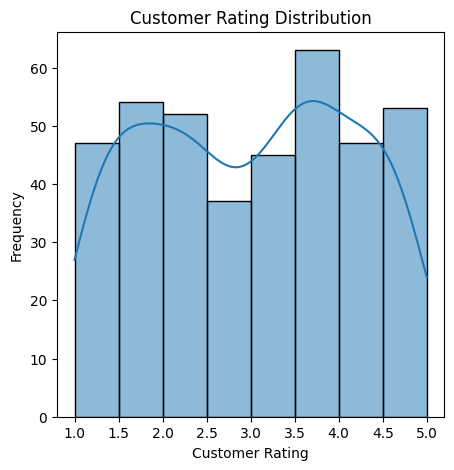

In [20]:
#histogram for Customer Rating distribution
plt.figure(figsize=(5,5))
sns.histplot(df['Customer rating'], bins=8, kde=True)
plt.title('Customer Rating Distribution')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the most products received customer ratings around 3.5, indicating a general level of satisfaction.
Fewer products received extreme ratings (very low or very high).
Distribution slightly skewed right, suggesting a few products with exceptionally high ratings.
Overall, general satisfaction with products, but with a range of opinions.

#### 2. Count of Products by Allergen Prediction: A bar chart showing the number of products with and without allergens

In [21]:
allergen_counts = df['Prediction'].value_counts()
allergen_counts

Prediction
1    255
0    143
Name: count, dtype: int64

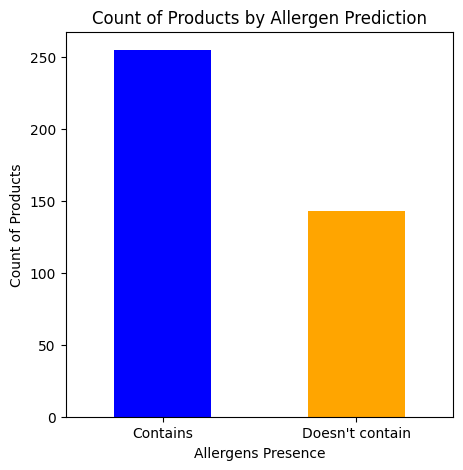

In [22]:
#count of products by Allergen Prediction
plt.figure(figsize=(5, 5))
allergen_counts.plot(kind='bar', color=['blue', 'orange'],)
plt.title('Count of Products by Allergen Prediction')
plt.xlabel('Allergens Presence')
plt.ylabel('Count of Products')
plt.xticks(ticks=[0,1], labels=['Contains',"Doesn't contain"],rotation=0)
plt.show()

The bar chart shows the number of products that contain or do not contain allergens. Most products contain allergens, while fewer products do not.

3. Price Distribution by Allergen Presence: A box plot displaying the price ranges for products with and without allergens.

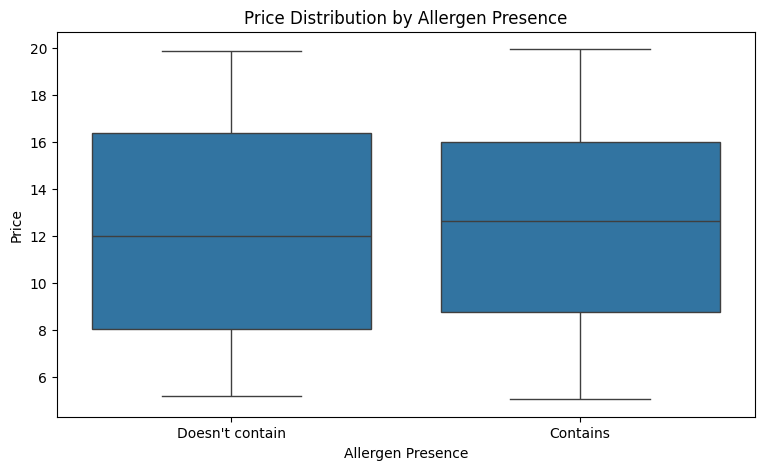

In [23]:
#box plot for displaying price ranges of productss with and without allergens
plt.figure(figsize=(9,5))
sns.boxplot(x='Prediction', y='Price', data=df)
plt.title('Price Distribution by Allergen Presence')
plt.xlabel('Allergen Presence')
plt.ylabel('Price')
plt.xticks(ticks=[0, 1], labels=["Doesn't contain", 'Contains'])
plt.show()

The box plot shows that the median price for products that contain allergens is slightly higher than the median price for products that do not contain allergens. However, there is also a significant overlap between the two groups, indicating that price is not solely determined by the presence or absence of allergens.

#### 4. Top 10 Most Common Main Ingredients: Showing the most common ingredients used in the food products.

In [24]:
ingredient_count=df['Main Ingredient'].value_counts().head(10)
ingredient_count

Main Ingredient
Chicken             61
Flour               16
Beef                15
Pasta               13
Tomatoes            12
Apples              12
Spinach             11
Shrimp              10
Mixed vegetables     8
Pizza dough          7
Name: count, dtype: int64

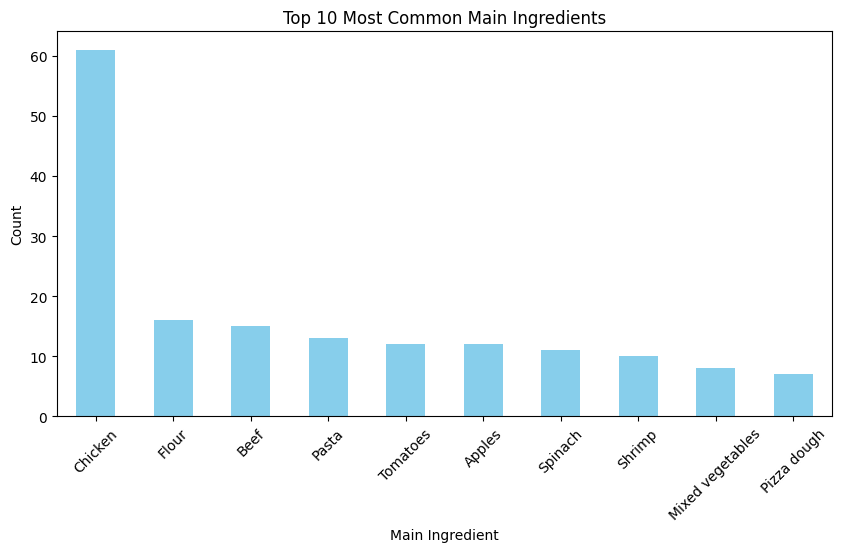

In [25]:
#bar plot to show the most common ingredients used in the food products
plt.figure(figsize=(10, 5))
ingredient_count.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Main Ingredients')
plt.xlabel('Main Ingredient')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The bar chart shows the frequency of the 10 most common main ingredients in the dataset. The x-axis represents the main ingredients, and the y-axis represents the count. The chart shows that chicken is the most common main ingredient, followed by flour, beef, pasta, and tomatoes. The other main ingredients, such as apples, spinach, shrimp, mixed vegetables, and pizza dough, have lower frequencies.

#### 5. Top 10 Most Frequent Allergens: Displaying the most common allergens.

In [26]:
#split and count the allergens in each record
allergen_counts=df['Allergens'].str.split(', ', expand=True).stack()
top_allergens=allergen_counts.value_counts().head(10)
top_allergens

Dairy        189
None         148
Wheat         95
Fish          20
Soybeans      17
Shellfish     16
Eggs          13
Milk           6
Nuts           5
Peanuts        5
Name: count, dtype: int64

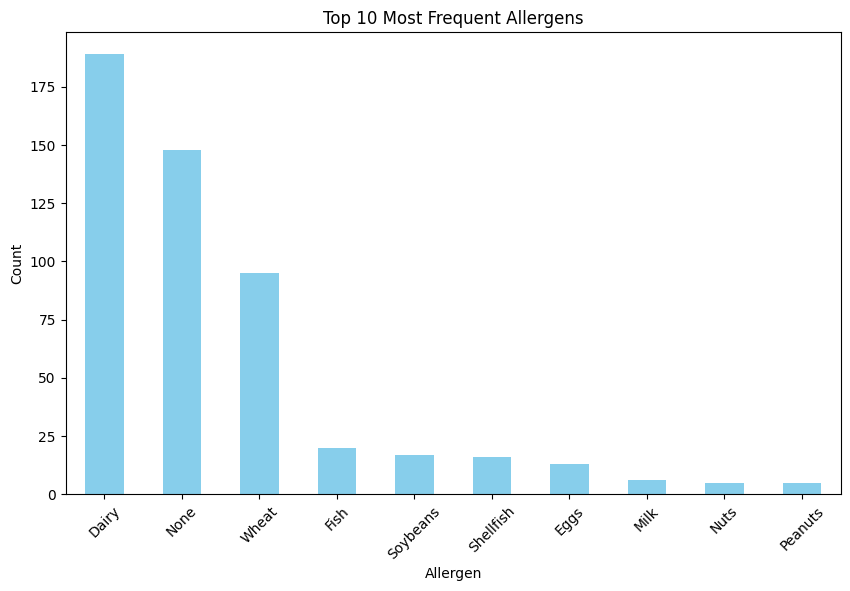

In [27]:
#bar plot to show Top 10 Most Frequent Allergens
plt.figure(figsize=(10, 6))
top_allergens.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Allergens')
plt.xlabel('Allergen')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This bar chart shows the frequency of the 10 most common allergens in the dataset. The x-axis represents the allergens, and the y-axis represents the count. The chart shows that dairy is the most common allergen, followed by none, wheat, fish, and soybeans. The other allergens, such as shellfish, eggs, milk, nuts, and peanuts, have lower frequencies.

#### 6. Number of Records by predictions for the Allergen 'None'

In [28]:
# Filter records where Allergens is 'None'
none_allergens_df = df[df['Allergens'] == 'None']

# Count the occurrences of Prediction values
prediction_counts = none_allergens_df['Prediction'].value_counts()

prediction_counts

Prediction
0    143
1      5
Name: count, dtype: int64

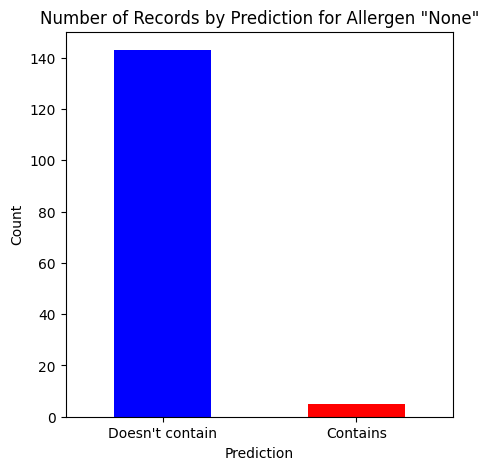

In [29]:
# Bar chart
plt.figure(figsize=(5,5))
prediction_counts.plot(kind='bar',color=['blue', 'red'])
plt.title('Number of Records by Prediction for Allergen "None"')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=["Doesn't contain", 'Contains'], rotation=0)
plt.show()

This bar chart shows the number of records that were predicted to contain or not contain the allergen, when the allergens are shown as none in the dataset.The chart shows that a significantly higher number of products were predicted to not contain the allergen when the allergens column shows "None"  compared to those predicted to contain it,when the allergens column shows "None".

#### 7.Customer Ratings vs. Allergen Count

In [30]:
# Function to count the number of allergens
def count_allergens(allergens):
    return len(allergens.split(', '))

# Apply the function to count allergens
df['Allergen Count'] = df['Allergens'].apply(count_allergens)

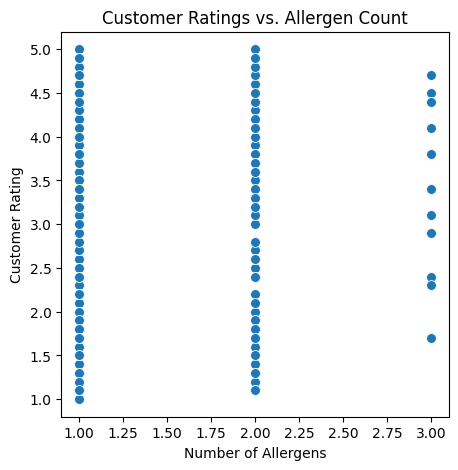

In [31]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Allergen Count', y='Customer rating', data=df, s=50)
plt.xlabel('Number of Allergens')
plt.ylabel('Customer Rating')
plt.title('Customer Ratings vs. Allergen Count')
plt.show()

This scatter plot shows the relationship between the number of allergens in a food product and its customer rating. The x-axis represents the number of allergens, and the y-axis represents the customer rating. The plot shows a general trend where products with a higher number of allergens tend to have lower customer ratings, although there are some exceptions. This suggests that the presence of allergens can negatively impact customer perception and satisfaction.

#### 8.Correlation Matrix

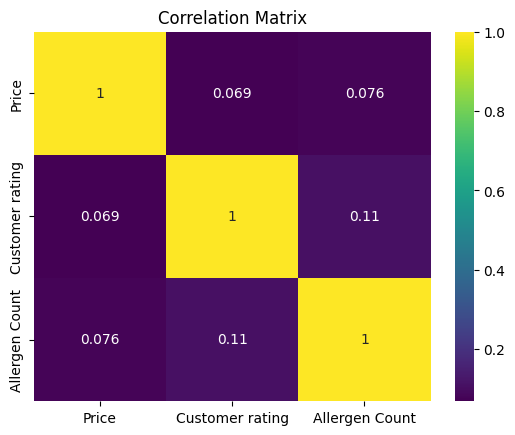

In [47]:
# Calculate correlation matrix
correlation_matrix = df[['Price', 'Customer rating', 'Allergen Count']].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation between the price, customer rating, and allergen count of the food products. The x-axis and y-axis represent the features, and the color of each cell indicates the strength and direction of the correlation. A dark blue cell indicates a strong negative correlation, a dark yellow cell indicates a strong positive correlation, and a white cell indicates no correlation.

From the heatmap, we can see that there is a weak positive correlation between price and customer rating, meaning that slightly higher-priced products tend to have slightly higher ratings. There is also a weak negative correlation between allergen count and customer rating, suggesting that products with fewer allergens tend to have slightly higher ratings. However, the correlation between price and allergen count is very weak, indicating that there is no significant relationship between these two features.

In [33]:
import plotly.express as px

In [34]:
import plotly
print(plotly.__version__)

5.24.1


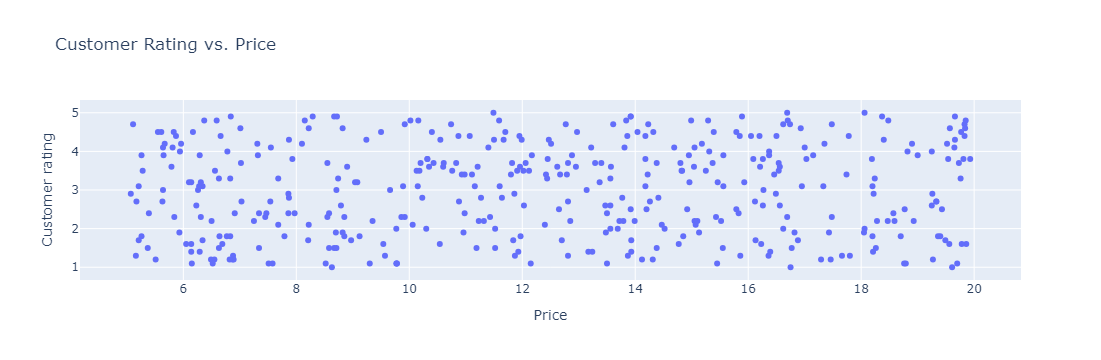

In [51]:
fig = px.scatter(df, x='Price', y='Customer rating',
                hover_data=['Main Ingredient', 'Allergen Count'],title="Customer Rating vs. Price")
fig.show()

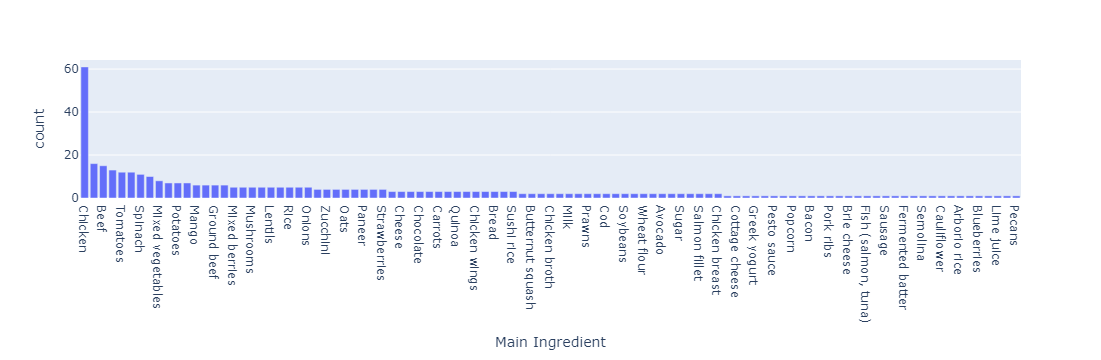

In [36]:
fig = px.bar(df['Main Ingredient'].value_counts().reset_index(),
            x='Main Ingredient', y='count',
            hover_data=['Main Ingredient'])
fig.show()

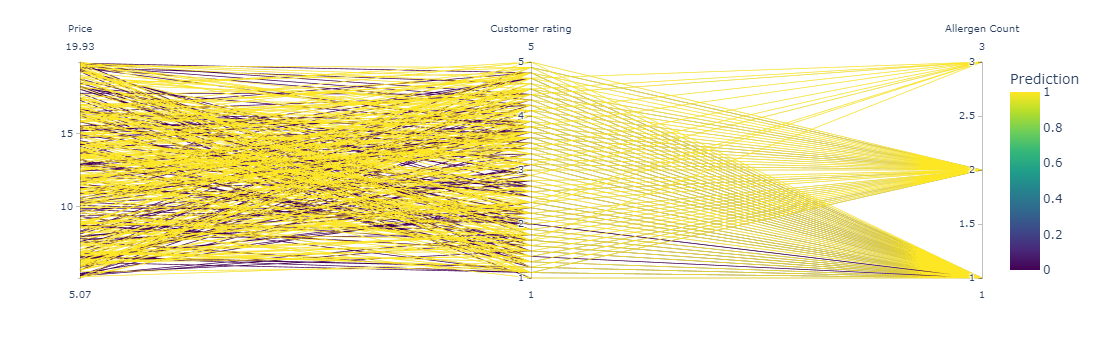

In [55]:
fig = px.parallel_coordinates(df, dimensions=['Price', 'Customer rating', 'Allergen Count'],
                             color='Prediction', color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

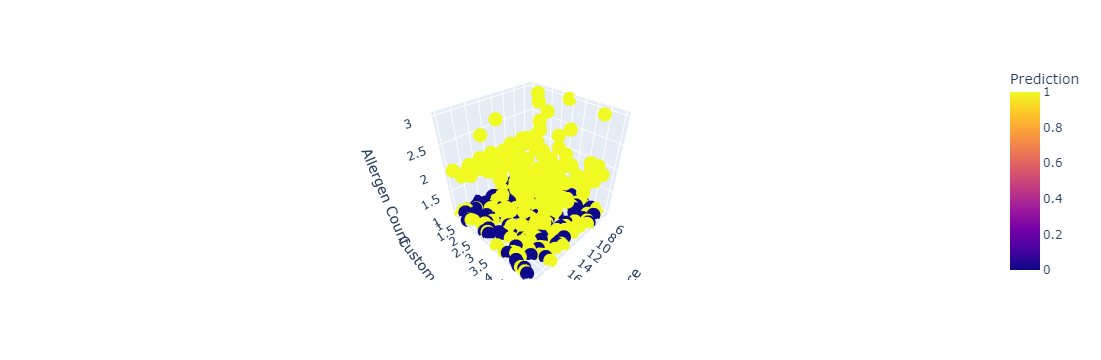

In [58]:
fig = px.scatter_3d(df, x='Price', y='Customer rating', z='Allergen Count',
                   color='Prediction')
fig.show()